# Heart Disease Prediction

In this machine learning project, I have collected the dataset from Kaggle (https://www.kaggle.com/ronitf/heart-disease-uci) and I will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

### Import libraries

Let's first import all the necessary libraries. I'll use `numpy` and `pandas` to start with. For visualization, I will use `pyplot` subpackage of `matplotlib` and use `rcParams` to add styling to the plots. For implementing Machine Learning models and processing of data, I will use the `sklearn` library.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline

For processing the data, I'll import a few libraries. First, to work with categorical features, I'll pass them through `LabelEncoder` to change them into numerical values that the Machine Learning model can understand. Then,  I'll pass all numeric categorical features through a `OneHotEncoder` which will create new columns equal to total distinct classes in a categorical variable and fill them with 1 and 0. 
To remove any biases because of different scales of each column, I'll use the `StandardScaler` to scale those values to a range of `-1` to `1`.
Next, to split the available dataset for testing and training, I'll use the `train_test_split` method.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [4]:
# Import Machine Learning Models here

### Import dataset

Now that we have all the libraries we will need, I can import the dataset and take a look at it. The dataset is stored in the file `dataset.csv`. I'll use the pandas `read_csv` method to read the dataset.

In [5]:
dataset = pd.read_csv('dataset.csv')

The dataset is now loaded into the variable `dataset`. I'll just take a glimpse of the data using the `desribe()` and `info()` methods before I actually start processing and visualizing it.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Looks like the dataset has a total of 303 rows and there are no missing values. There are a total of `13 features` along with one target value which we wish to find.

In [7]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The scale of each feature column is different and quite varied as well. While the maximum for `age` reaches 77, the maximum of `chol` (serum cholestoral) is 564.

### Understanding the data

Now, we can use visualizations to better understand our data and then look at any processing we might want to do.

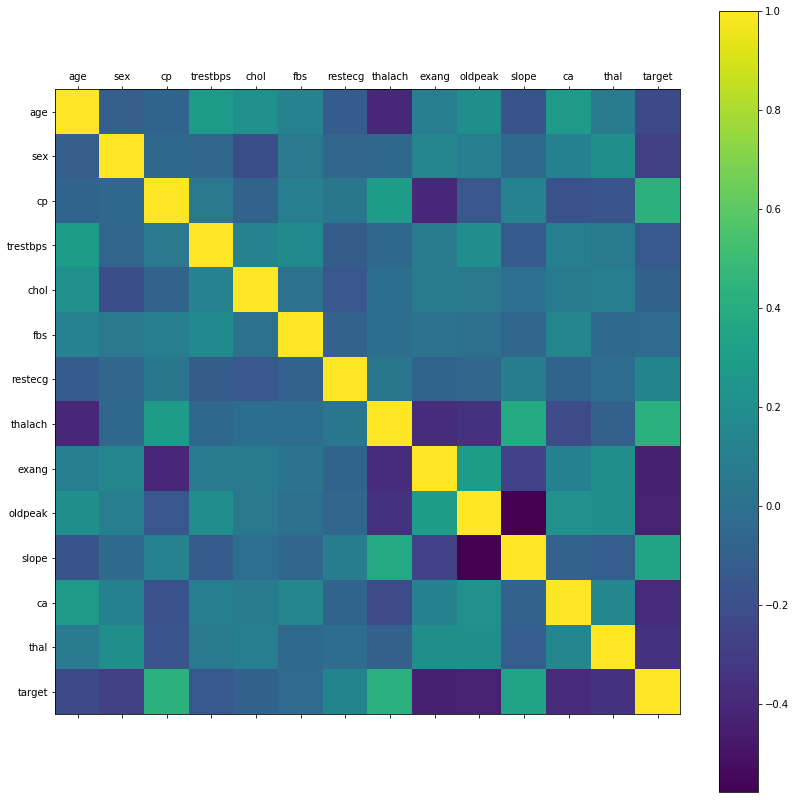

In [22]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()